In [2]:
from datetime import datetime
import pandas_datareader.data as dr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
import matplotlib.ticker as ticker #used for changing tick spacing
from finta import TA

In [ ]:
!jupyter labextension install @jupyterlab/plotly-extension

In [ ]:
!conda install -c conda-forge nodejs 

In [3]:
# stocklist = ['MSFT', 'AAPL', 'GOOG', 'FB', 'AMZN', 'V']
stocklist = 'V'

start = datetime(2019,6,9)
end = datetime(2021,6,9)

v = dr.DataReader(stocklist, 'yahoo', start, end)

In [4]:
v

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,172.020004,170.509995,171.839996,170.820007,7565900.0,168.739441
2019-06-11,172.179993,168.419998,171.949997,170.309998,6082900.0,168.235641
2019-06-12,171.619995,169.699997,170.380005,171.589996,6772000.0,169.500061
2019-06-13,172.199997,168.720001,172.139999,169.350006,6901400.0,167.287338
2019-06-14,170.639999,168.839996,169.770004,169.660004,4999900.0,167.593567
...,...,...,...,...,...,...
2021-06-03,230.389999,227.770004,229.000000,228.110001,6382400.0,228.110001
2021-06-04,230.699997,228.729996,229.350006,230.139999,5084900.0,230.139999
2021-06-07,234.679993,230.080002,232.850006,231.320007,5421300.0,231.320007


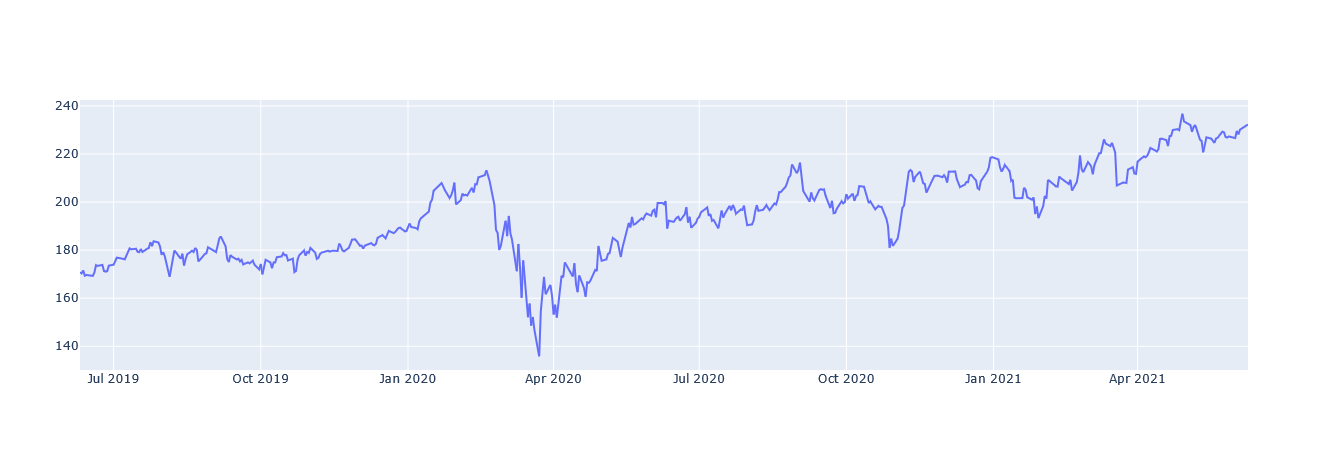

In [5]:
trace0 = go.Scatter(x=v.index, y=v.Close)
data = [trace0]
py.iplot(data)

In [5]:
fig_size = plt.rcParams["figure.figsize"] #loads current figure size
print('old size:',fig_size) #prints the size
fig_size[0] = 15 #sets the X size to 15
fig_size[1] = 8 #sets the Y size to 8
plt.rcParams["figure.figsize"] = fig_size #sets this numbers to the new size
fig_size = plt.rcParams["figure.figsize"] #loads the figure size for checking
print ('new size:',fig_size) #prints the figure size

old size: [6.0, 4.0]
new size: [15.0, 8.0]


Text(0.5, 0, 'Date')

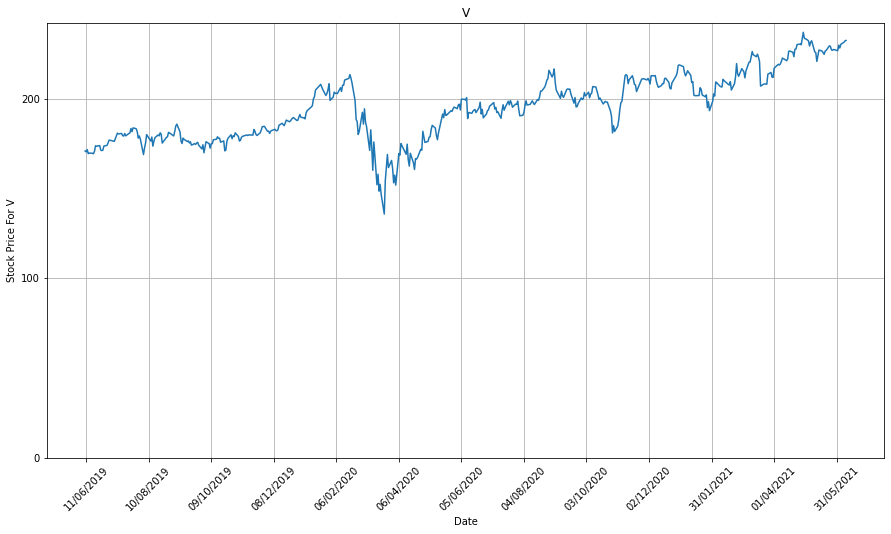

In [6]:
# x = [datetime.strptime(d,'%Y-%m-%d').date() for d in v.index.values] #convert date to something python understands
x = v.index
y = v.Close #plots which ever catagory you entered above

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y')) #display the date properly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60)) #x axis tick every 60 days
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100

plt.plot(x,y) #plots the x and y
plt.grid(True) #turns on axis grid
plt.ylim(0) #sets the y axis min to zero
plt.xticks(rotation=45,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
plt.title(stocklist) #prints the title on the top
plt.ylabel('Stock Price For '+ stocklist) #labels y axis
plt.xlabel('Date') #labels x axis


### adding more features and checking their correlation